In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
test = pd.read_csv('test_complete.csv')

In [3]:
test.shape

(783, 33)

In [4]:
test.head(2)

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,deberta_cohesion,deberta_syntax,...,gpt_phraseology,gpt_grammar,gpt_conventions,word_count,sentence_count,lexical_diversity,avg_sentence_length,spelling_errors,rare_words,rare_words_usage
0,BA14C47026ED,The principal is considering changing school p...,2.0,2.0,2.5,1.5,2.5,2.5,2.355058,2.273745,...,2.0,2.0,2.0,76,5,0.565789,15.200000,0,0,set()
1,72766FE38307,dear principal i think they should help to do ...,2.5,2.0,2.5,2.0,2.5,2.5,2.145398,2.166032,...,1.5,2.0,1.5,82,7,0.524390,11.714286,2,0,set()


# Model Performance

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the measures
models = ['deberta', 'distil', 'gpt']
measures = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']

# Calculate MSE and MAE for each measure
results = {}
for model in models:
    for measure in measures:
        mse = mean_squared_error(test[measure], test[f'{model}_{measure}'])
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(test[measure], test[f'{model}_{measure}'])
        results[model + '_' + measure] = {'Model': model, 'Measure': measure, 'MSE': mse, 'RMSE': rmse, 'MAE': mae}
        results_df = pd.DataFrame(results).T
results_df = results_df.reset_index(drop=True)
display(results_df)

,Model,Measure,MSE,RMSE,MAE
0,deberta,cohesion,0.242084,0.49202,0.393457
1,deberta,syntax,0.202839,0.450377,0.356902
2,deberta,vocabulary,0.182423,0.42711,0.346072
3,deberta,phraseology,0.208654,0.456786,0.369804
4,deberta,grammar,0.225051,0.474395,0.377582
5,deberta,conventions,0.199677,0.446853,0.354958
6,distil,cohesion,0.408123,0.638845,0.504956
7,distil,syntax,0.362956,0.602458,0.476548
8,distil,vocabulary,0.301949,0.549499,0.439372
9,distil,phraseology,0.38253,0.61849,0.505366


# Hypothesis Test Similar vs. Dissimilar

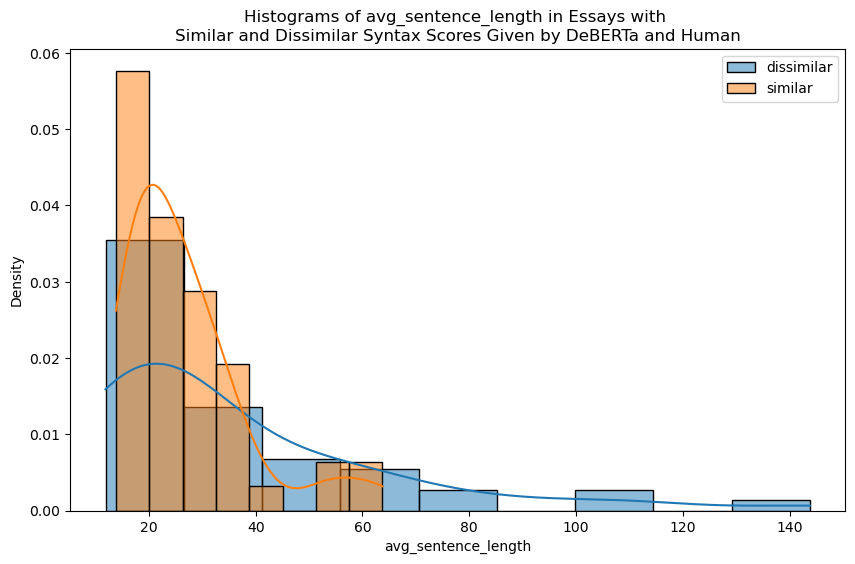

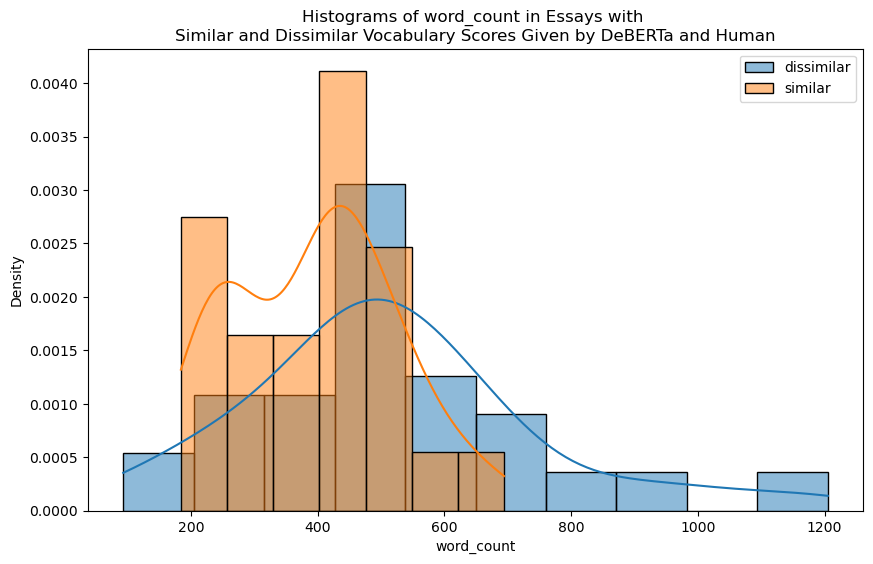

{'cohesion': [],
 'syntax': [('avg_sentence_length', 36.23, 26.48, 2.25, 0.03)],
 'vocabulary': [('word_count', 517.3, 393.9, 3.33, 0.0)],
 'phraseology': [],
 'grammar': [],
 'conventions': []}

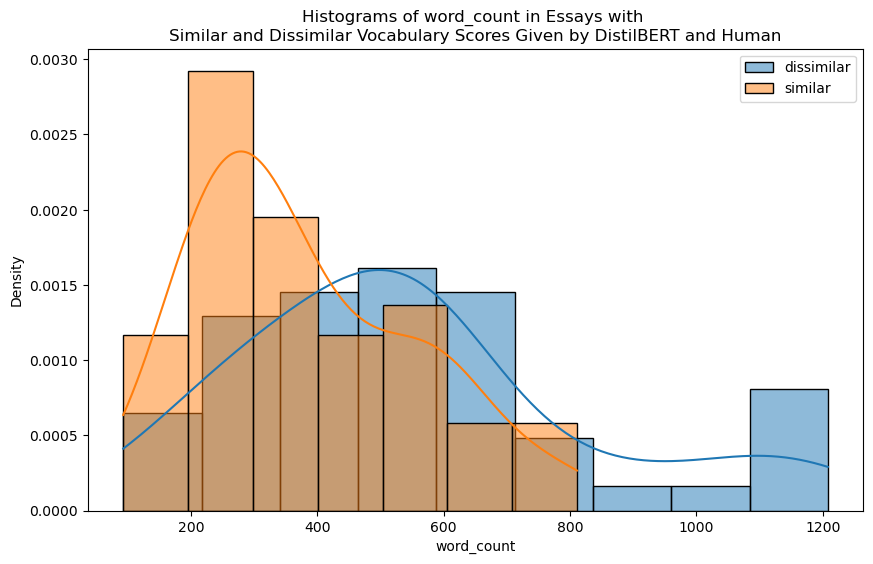

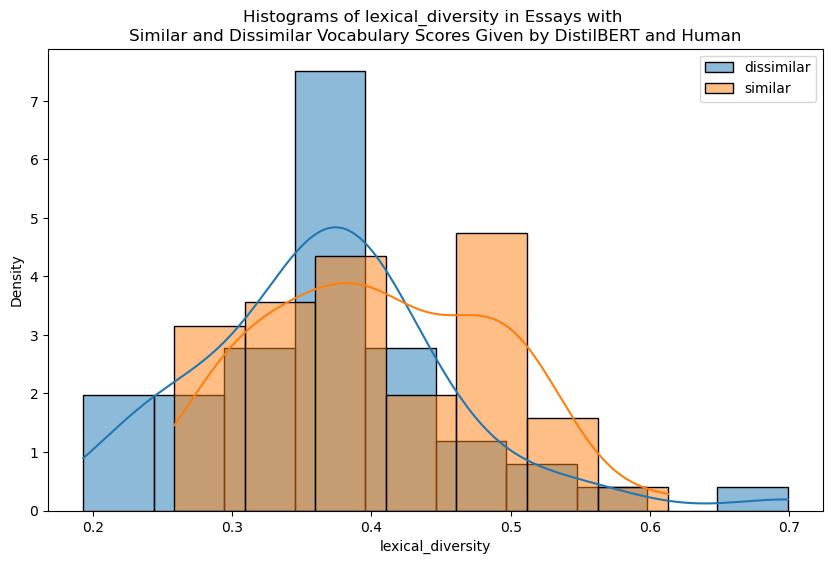

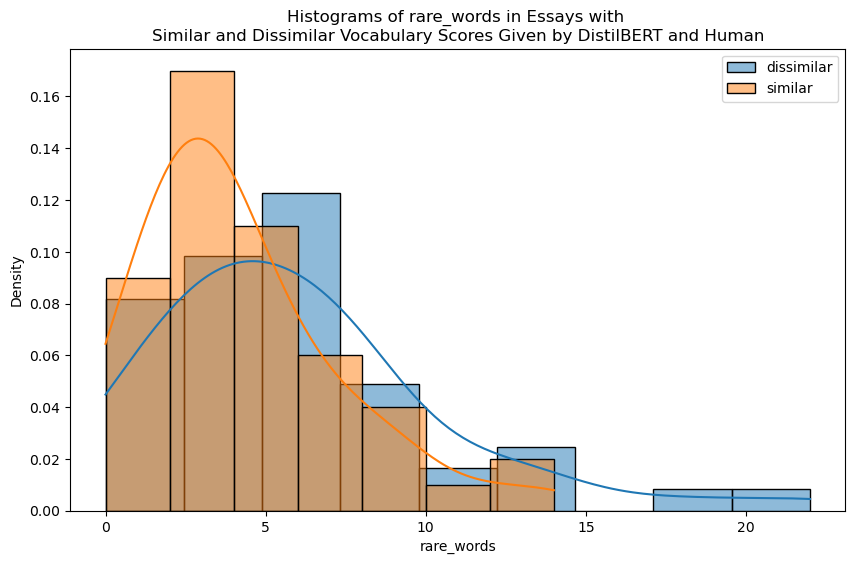

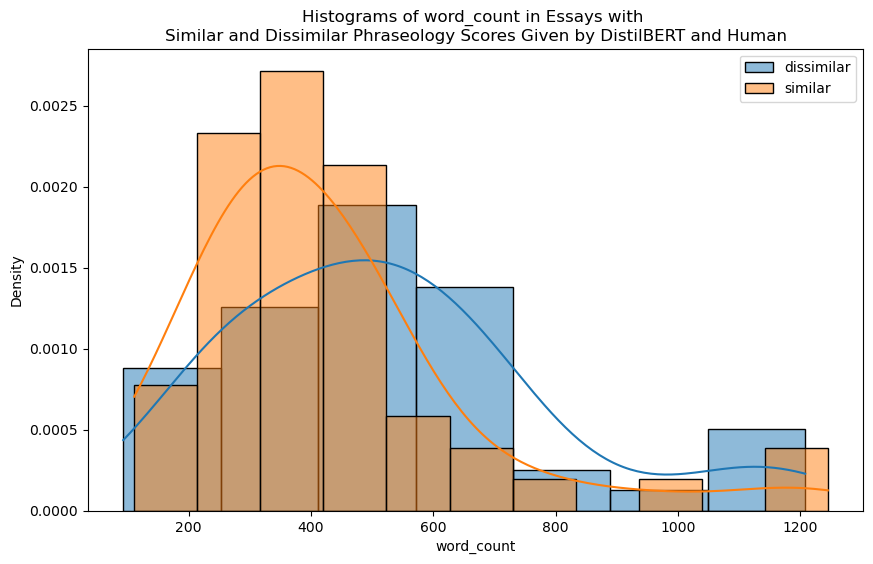

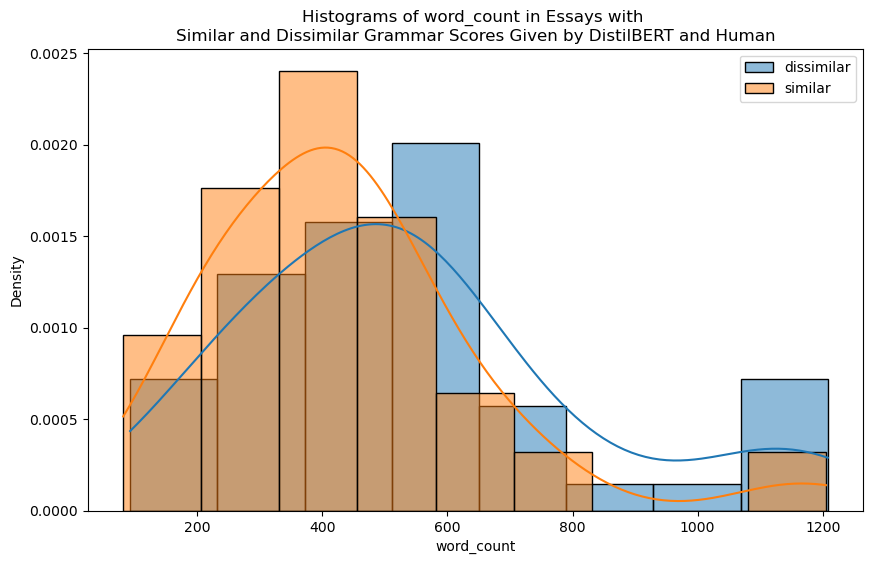

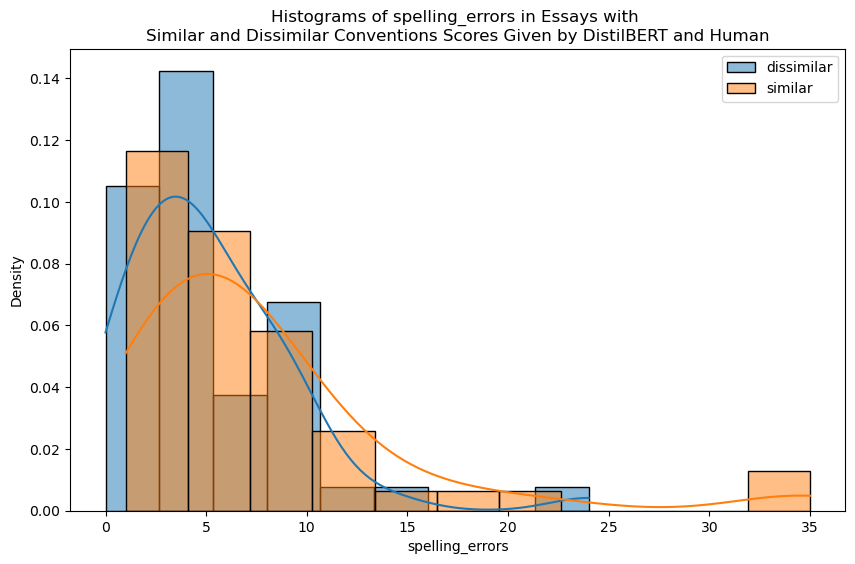

{'cohesion': [],
 'syntax': [],
 'vocabulary': [('word_count', 546.92, 380.12, 3.62, 0.0),
  ('lexical_diversity', 0.37, 0.41, -2.14, 0.03),
  ('rare_words', 5.94, 4.12, 2.37, 0.02)],
 'phraseology': [('word_count', 523.9, 423.8, 2.05, 0.04)],
 'grammar': [('word_count', 538.94, 433.8, 2.12, 0.04)],
 'conventions': [('spelling_errors', 5.12, 7.62, -2.13, 0.04)]}

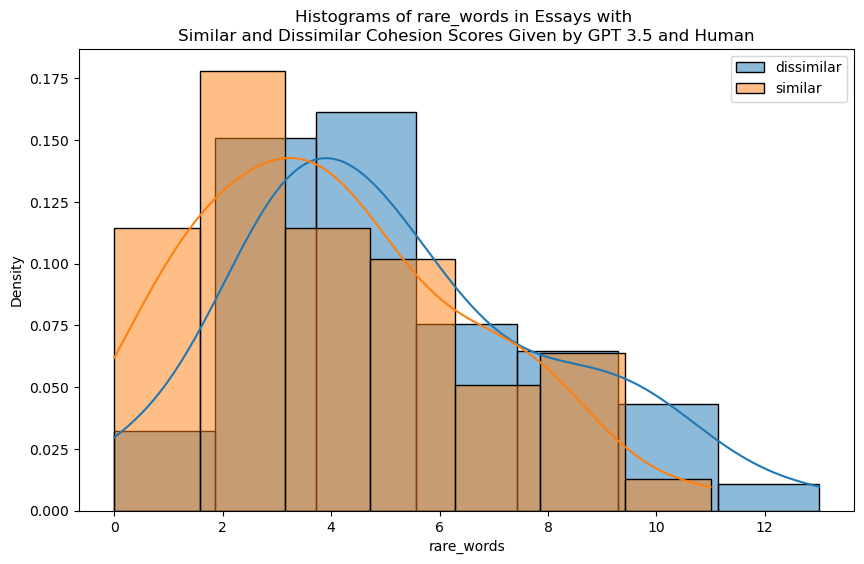

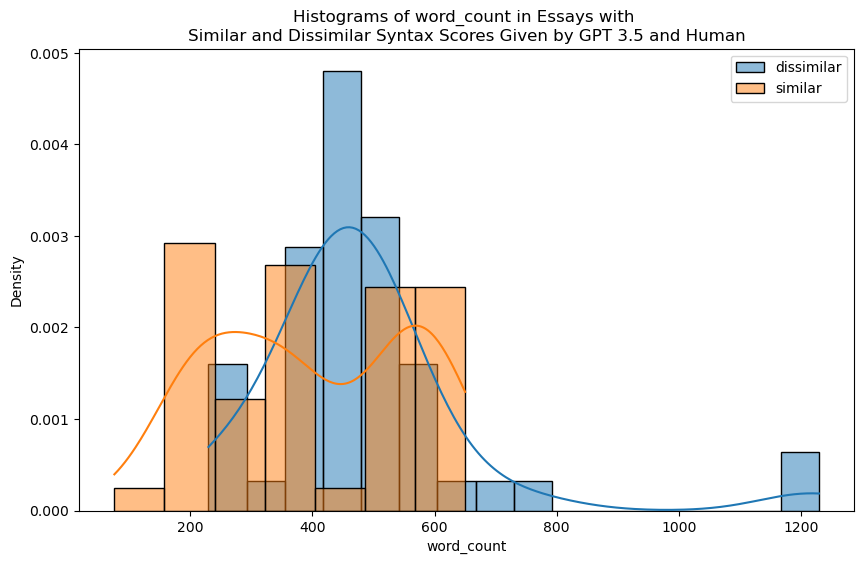

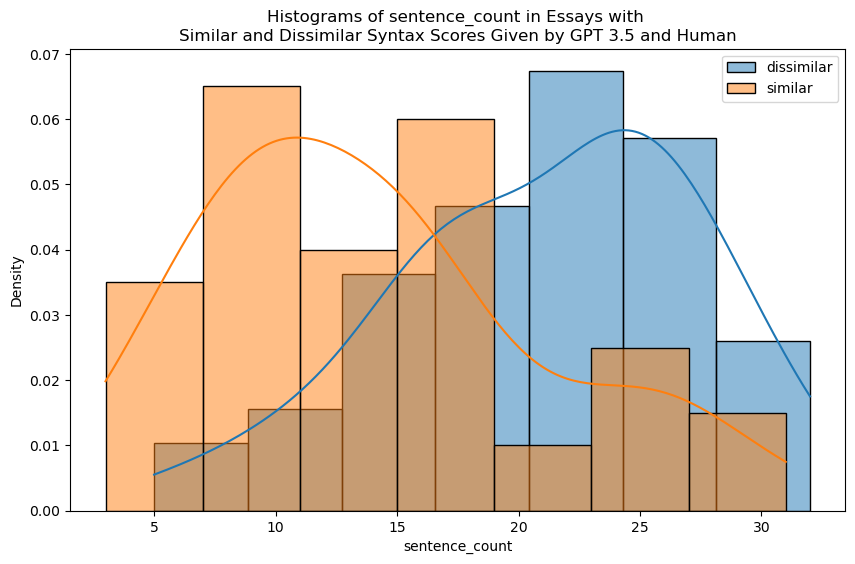

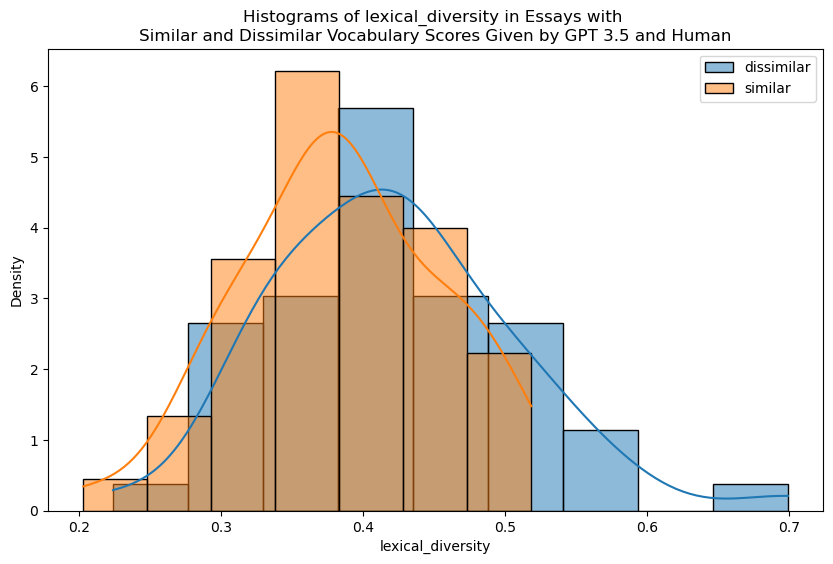

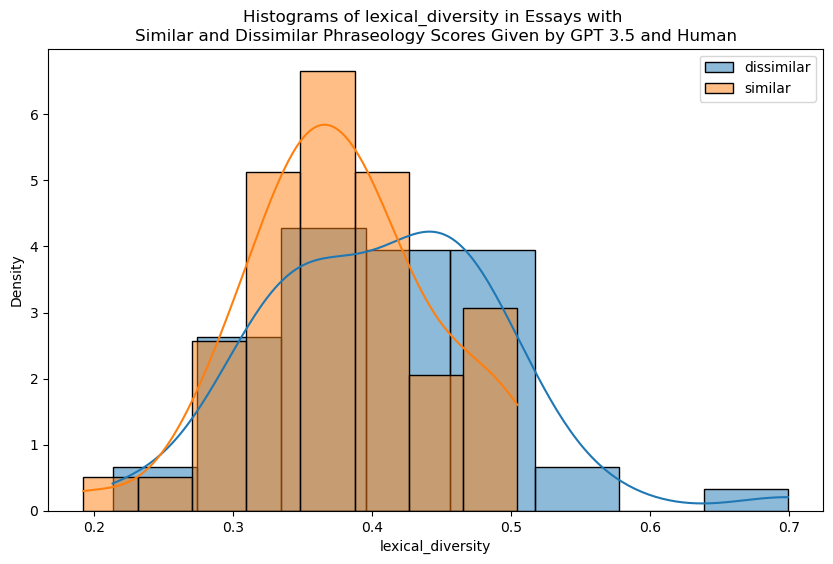

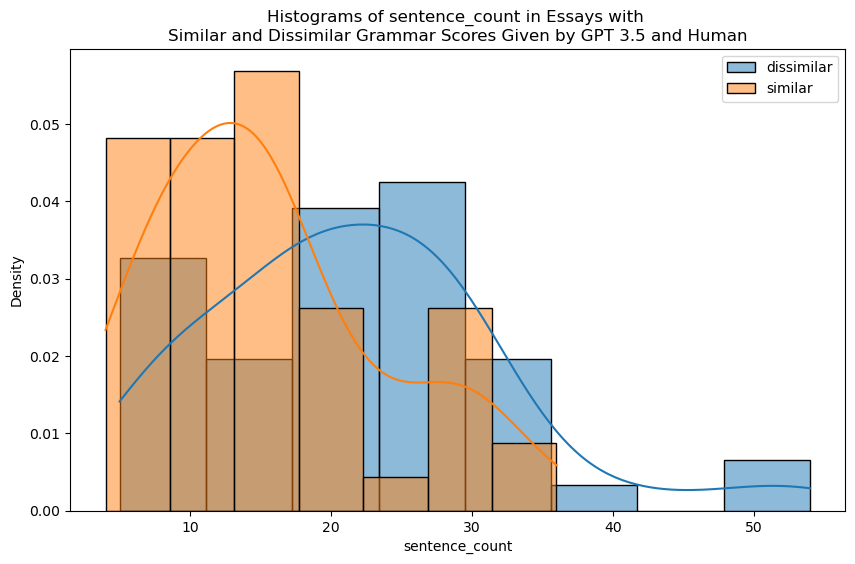

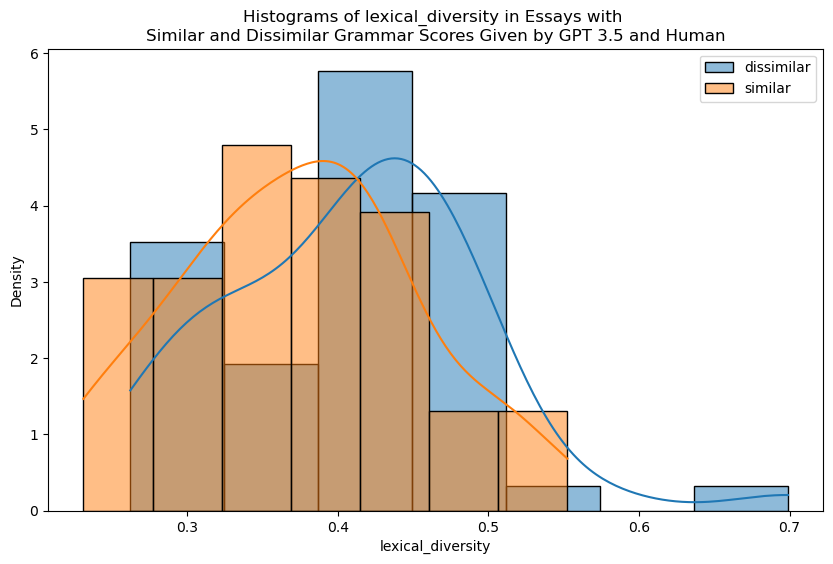

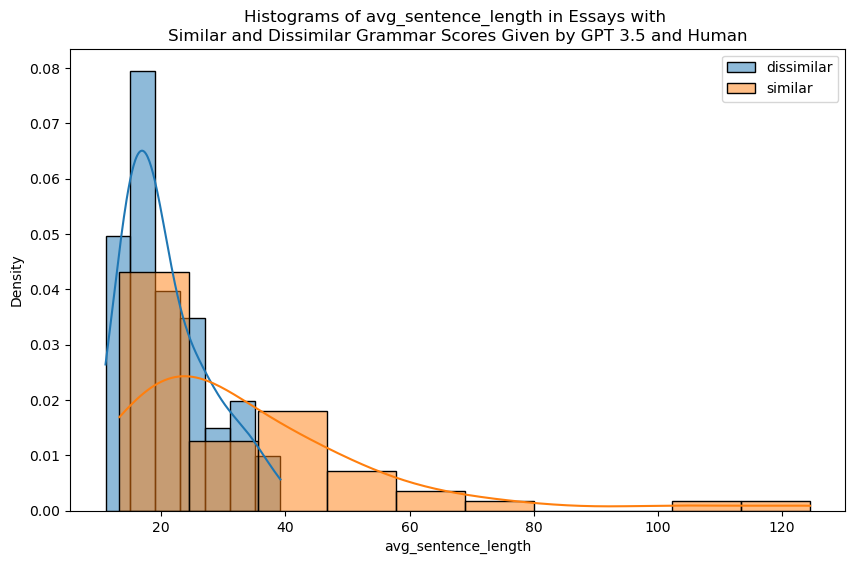

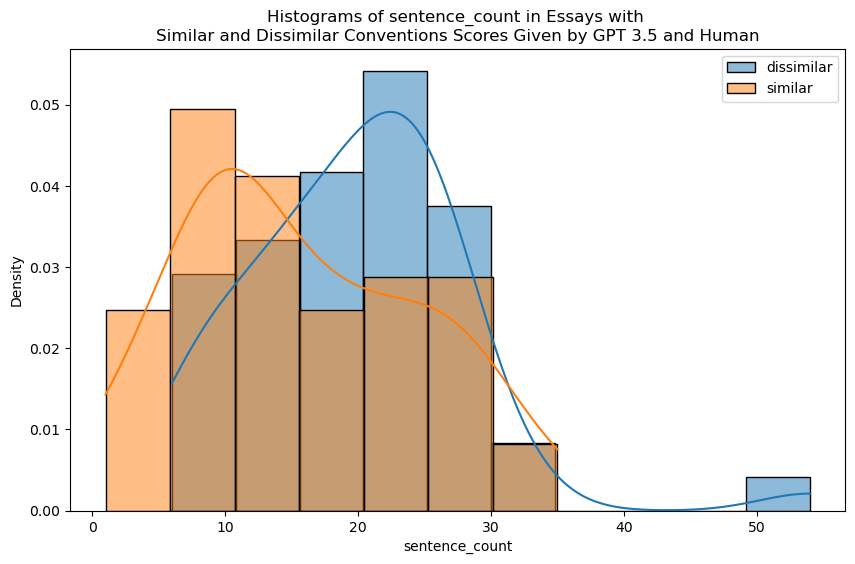

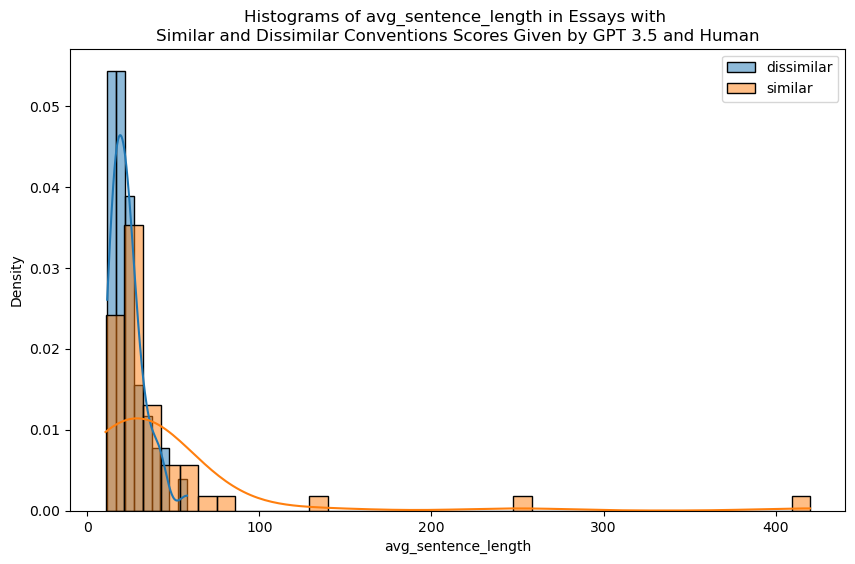

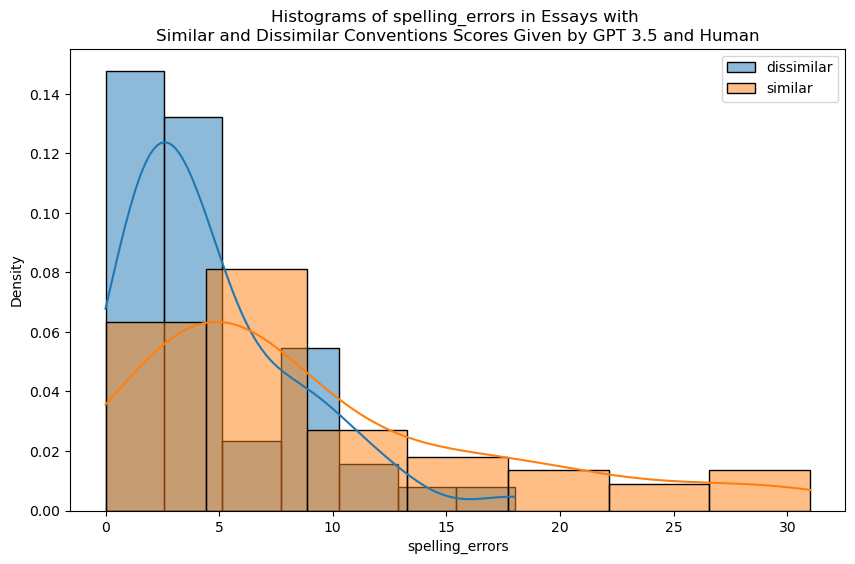

{'cohesion': [('rare_words', 5.16, 4.0, 2.09, 0.04)],
 'syntax': [('word_count', 484.86, 399.9, 2.46, 0.02),
  ('sentence_count', 21.2, 13.94, 5.52, 0.0)],
 'vocabulary': [('lexical_diversity', 0.42, 0.38, 2.35, 0.02)],
 'phraseology': [('lexical_diversity', 0.41, 0.38, 2.06, 0.04)],
 'grammar': [('sentence_count', 21.62, 15.52, 3.27, 0.0),
  ('lexical_diversity', 0.41, 0.37, 2.14, 0.03),
  ('avg_sentence_length', 20.7, 34.48, -4.25, 0.0)],
 'conventions': [('sentence_count', 19.88, 15.74, 2.41, 0.02),
  ('avg_sentence_length', 23.26, 45.08, -2.34, 0.02),
  ('spelling_errors', 4.6, 9.36, -3.77, 0.0)]}

In [7]:
features = [
    'word_count', 'sentence_count', 'lexical_diversity', 
    'avg_sentence_length', 'spelling_errors', 'rare_words'
]

model = ['deberta', 'distil', 'gpt']
model_dict = {'deberta': 'DeBERTa', 'distil': 'DistilBERT', 'gpt': 'GPT 3.5'}
measures = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
test_results = {}

for model in models:
    for measure in measures: 
        tmp = test[[measure, f'{model}_{measure}']]
        tmp['diff'] = abs(tmp[measure] - tmp[f'{model}_{measure}'])
        poor_index = tmp.sort_values(by='diff', ascending=False).head(50).index
        good_index = tmp.sort_values(by='diff', ascending=False).tail(50).index
        poor = test.loc[poor_index, features]
        good = test.loc[good_index, features]
    
        result = []
        for feature in features:
            poor_mean = round(poor[feature].mean(), 2)
            good_mean = round(good[feature].mean(), 2)
            t_stat, p_val = stats.ttest_ind(poor[feature], good[feature], equal_var=False)
            if p_val < 0.05:
                result.append((feature, poor_mean, good_mean, round(t_stat, 2), round(p_val, 2)))
                fig = plt.figure(figsize=(10, 6))
                sns.histplot(data=poor, x=feature, stat='density', kde=True, label='dissimilar')
                sns.histplot(data=good, x=feature, stat='density', kde=True, label='similar')
                plt.title(
                    f"Histograms of {feature} in Essays with \n" 
                    f"Similar and Dissimilar {measure.capitalize()} Scores Given by {model_dict[model]} and Human"
                )
                plt.legend()
                plt.show()
                # fig.savefig(f'{model}-{measure}_{feature}.png', dpi=200)
        test_results[measure] = result
    display(test_results)